In [3]:
import re
import matplotlib.pyplot as plt

def extract_metric_from_log(log_file, metric):
    metric_values = []
    with open(log_file, 'r') as file:
        for line in file:
            match = re.search(rf'{metric}: ([0-9.]+)', line)
            if match:
                metric_values.append(float(match.group(1)))
    return metric_values

def plot_metrics(log_dict, metric):
    for label, log_file in log_dict.items():
        metric_values = extract_metric_from_log(log_file, metric)
        plt.plot(metric_values, label=label)  # Use the directory name as the label

    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.ylim(0.7, 0.95)
    plt.title(f'{metric}')
    plt.legend()
    plt.show()

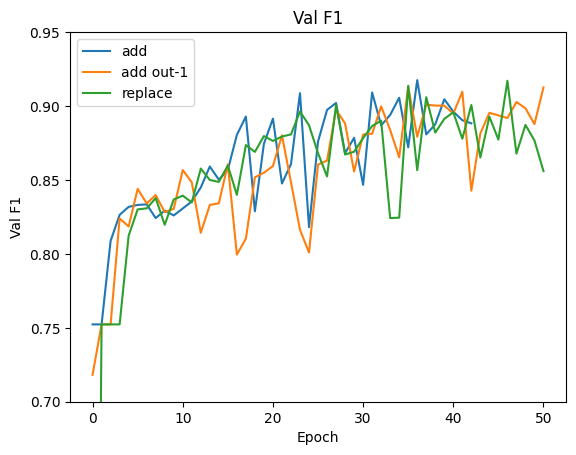

In [7]:
log_dict = {
    'add': '/home/zyq123/TONN/tonn_fusion/fusion/tt_runs/2817821/exp.log',
    'add out-1': '/home/zyq123/TONN/tonn_fusion/fusion/tt_runs/2821523/exp.log',
    'replace': '/home/zyq123/TONN/tonn_fusion/fusion/tt_runs/2836054/exp.log'
}

metric = 'Val F1'  # Metric to plot

plot_metrics(log_dict, metric)

In [22]:
class NoiseResult:
    def __init__(self, name, x_axis, y_weight, y_phase):
        self.name = name
        self.weight_pretrain = 86.45
        self.phase_pretrain = 84.06
        self.x_axis = x_axis
        self.y_weight = y_weight
        self.y_phase = y_phase

Random_phase_bias = NoiseResult('Random phase bias', 
                          [0, 1], 
                          [86.45, 9.43], 
                          [83.21, 84.06])

Gamma_noise = NoiseResult('Gamma noise', 
                          [0, 0.001, 0.002, 0.005], 
                          [86.45, 86.50, 86.50, 82.37], 
                          [83.72, 84.03, 84.06, 70.28])

Crosstalk = NoiseResult('Crosstalk', 
                          [0, 0.001, 0.005, 0.01], 
                          [86.45, 86.26, 83.99, 50.51], 
                          [84.98, 85.20, 84.06, 80.86])



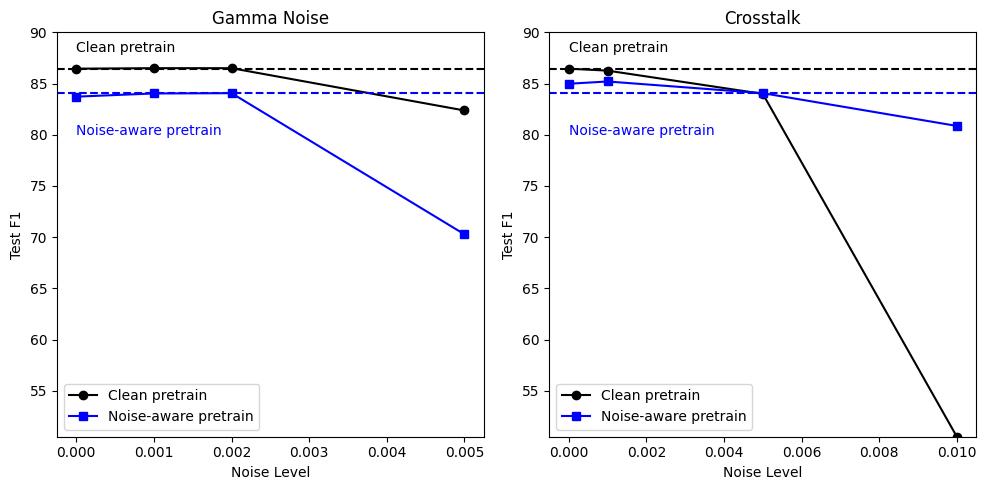

In [21]:
import matplotlib.pyplot as plt

# Create subfigures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot gamma_noise in subfigure 1
ax1.plot(Gamma_noise.x_axis, Gamma_noise.y_weight, 'k-o', label='Clean pretrain')
ax1.plot(Gamma_noise.x_axis, Gamma_noise.y_phase, 'b-s', label='Noise-aware pretrain')
ax1.axhline(y=Gamma_noise.weight_pretrain, color='k', linestyle='--')
ax1.axhline(y=Gamma_noise.phase_pretrain, color='b', linestyle='--')
ax1.text(0, Gamma_noise.weight_pretrain+2, 'Clean pretrain', color='k', va='center', ha='left', backgroundcolor='w')
ax1.text(0, Gamma_noise.phase_pretrain-3, 'Noise-aware pretrain', color='b', va='top', ha='left', backgroundcolor='w')
ax1.set_title('Gamma Noise')
ax1.set_xlabel('Noise Level')
ax1.set_ylabel('Test F1')
ax1.legend()

# Plot Crosstalk in subfigure 2
ax2.plot(Crosstalk.x_axis, Crosstalk.y_weight, 'k-o', label='Clean pretrain')
ax2.plot(Crosstalk.x_axis, Crosstalk.y_phase, 'b-s', label='Noise-aware pretrain')
ax2.axhline(y=Crosstalk.weight_pretrain, color='k', linestyle='--')
ax2.axhline(y=Crosstalk.phase_pretrain, color='b', linestyle='--')
ax2.text(0, Gamma_noise.weight_pretrain+2, 'Clean pretrain', color='k', va='center', ha='left', backgroundcolor='w')
ax2.text(0, Gamma_noise.phase_pretrain-3, 'Noise-aware pretrain', color='b', va='top', ha='left', backgroundcolor='w')
ax2.set_title('Crosstalk')
ax2.set_xlabel('Noise Level')
ax2.set_ylabel('Test F1')
ax2.legend()

# Set the same y-axis limits for both subfigures
y_min = min(min(Gamma_noise.y_weight), min(Gamma_noise.y_phase), min(Crosstalk.y_weight), min(Crosstalk.y_phase))
y_max = 90
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Show plot
plt.tight_layout()
plt.show()

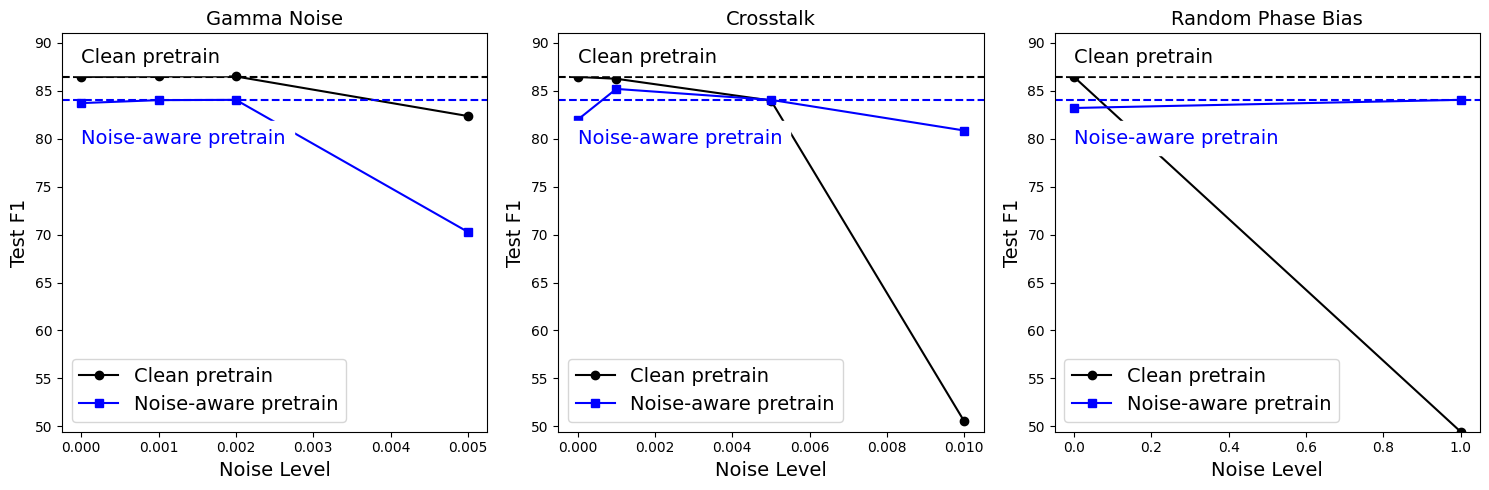

In [ ]:
import matplotlib.pyplot as plt

# Define the NoiseResult class and create instances
class NoiseResult:
    def __init__(self, name, x_axis, y_weight, y_phase):
        self.name = name
        self.weight_pretrain = 86.45
        self.phase_pretrain = 84.06
        self.x_axis = x_axis
        self.y_weight = y_weight
        self.y_phase = y_phase

Gamma_noise = NoiseResult('Gamma noise', 
                          [0, 0.001, 0.002, 0.005], 
                          [86.45, 86.50, 86.50, 82.37], 
                          [83.72, 84.03, 84.06, 70.28])

Crosstalk = NoiseResult('Crosstalk', 
                          [0, 0.001, 0.005, 0.01], 
                          [86.45, 86.26, 83.99, 50.51], 
                          [81.98, 85.20, 84.06, 80.86])

Random_phase_bias = NoiseResult('Random phase bias', 
                          [0, 1], 
                          [86.45, 49.43], 
                          [83.21, 84.06])

# Set font size
font_size = 14

# Create subfigures
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot gamma_noise in subfigure 1
ax1.plot(Gamma_noise.x_axis, Gamma_noise.y_weight, 'k-o', label='Clean pretrain')
ax1.plot(Gamma_noise.x_axis, Gamma_noise.y_phase, 'b-s', label='Noise-aware pretrain')
ax1.axhline(y=Gamma_noise.weight_pretrain, color='k', linestyle='--')
ax1.axhline(y=Gamma_noise.phase_pretrain, color='b', linestyle='--')
ax1.text(0, Gamma_noise.weight_pretrain+3, 'Clean pretrain', color='k', va='center', ha='left', backgroundcolor='w', fontsize=font_size)
ax1.text(0, Gamma_noise.phase_pretrain-3, 'Noise-aware pretrain', color='b', va='top', ha='left', backgroundcolor='w', fontsize=font_size)
ax1.set_title('Gamma Noise', fontsize=font_size)
ax1.set_xlabel('Noise Level', fontsize=font_size)
ax1.set_ylabel('Test F1', fontsize=font_size)
ax1.legend(fontsize=font_size)

# Plot Crosstalk in subfigure 2
ax2.plot(Crosstalk.x_axis, Crosstalk.y_weight, 'k-o', label='Clean pretrain')
ax2.plot(Crosstalk.x_axis, Crosstalk.y_phase, 'b-s', label='Noise-aware pretrain')
ax2.axhline(y=Crosstalk.weight_pretrain, color='k', linestyle='--')
ax2.axhline(y=Crosstalk.phase_pretrain, color='b', linestyle='--')
ax2.text(0, Gamma_noise.weight_pretrain+3, 'Clean pretrain', color='k', va='center', ha='left', backgroundcolor='w', fontsize=font_size)
ax2.text(0, Gamma_noise.phase_pretrain-3, 'Noise-aware pretrain', color='b', va='top', ha='left', backgroundcolor='w', fontsize=font_size)
ax2.set_title('Crosstalk', fontsize=font_size)
ax2.set_xlabel('Noise Level', fontsize=font_size)
ax2.set_ylabel('Test F1', fontsize=font_size)
ax2.legend(fontsize=font_size)

# Plot Random_phase_bias in subfigure 3
ax3.plot(Random_phase_bias.x_axis, Random_phase_bias.y_weight, 'k-o', label='Clean pretrain')
ax3.plot(Random_phase_bias.x_axis, Random_phase_bias.y_phase, 'b-s', label='Noise-aware pretrain')
ax3.axhline(y=Random_phase_bias.weight_pretrain, color='k', linestyle='--')
ax3.axhline(y=Random_phase_bias.phase_pretrain, color='b', linestyle='--')
ax3.text(0, Gamma_noise.weight_pretrain+3, 'Clean pretrain', color='k', va='center', ha='left', backgroundcolor='w', fontsize=font_size)
ax3.text(0, Gamma_noise.phase_pretrain-3, 'Noise-aware pretrain', color='b', va='top', ha='left', backgroundcolor='w', fontsize=font_size)
ax3.set_title('Random Phase Bias', fontsize=font_size)
ax3.set_xlabel('Noise Level', fontsize=font_size)
ax3.set_ylabel('Test F1', fontsize=font_size)
ax3.legend(fontsize=font_size)

# Set the same y-axis limits for all subfigures
y_min = min(min(Gamma_noise.y_weight), min(Gamma_noise.y_phase), min(Crosstalk.y_weight), min(Crosstalk.y_phase), min(Random_phase_bias.y_weight), min(Random_phase_bias.y_phase))
y_max = 91
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)
ax3.set_ylim(y_min, y_max)

# Show plot
plt.tight_layout()
plt.show()